# https://github.com/GCDigitalFellows/gcdri_ts_cat_ml

![Titanic](figs/RMS_titanic_3.jpg)

# [Kaggle Titanic Data](https://www.kaggle.com/c/titanic/data)

VARIABLE DESCRIPTIONS
=====================
```
survival: Survival (0 = No; 1 = Yes)|
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name
sex: Sex
age: Age
```

VARIABLE DESCRIPTIONS
=====================
```
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare
cabin: Cabin
embarked: Port of Embarkation 
    (C = Cherbourg; Q = Queenstown; S = Southampton)
```

SPECIAL NOTES
==============
```
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
```

Family Notes
============
```
With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```


In [1]:
ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 2692-BF8D

 Directory of C:\Users\story645\Desktop\gcdri_ts_cat_ml

06/09/2016  10:39 AM    <DIR>          .
06/09/2016  10:39 AM    <DIR>          ..
06/09/2016  01:45 AM    <DIR>          .git
06/05/2016  04:05 PM               764 .gitignore
06/09/2016  09:37 AM    <DIR>          .ipynb_checkpoints
06/09/2016  01:45 AM            99,867 cat_ts_1.ipynb
06/09/2016  01:44 AM           361,867 cat_ts_2.ipynb
06/09/2016  01:08 AM    <DIR>          figs
06/09/2016  01:45 AM           668,206 grad.ipynb
06/09/2016  01:44 AM            21,067 graduation.csv
06/05/2016  04:34 PM           112,951 pd_collections.csv
06/05/2016  09:43 PM               532 README.md
06/05/2016  06:36 PM               546 README.md~
06/08/2016  08:28 PM            61,194 titanic.csv
06/09/2016  10:39 AM            18,758 titanic.ipynb
06/08/2016  08:45 PM            28,629 titanictest.csv
06/09/2016  09:39 AM             1,015 Untitled.ipynb
            

In [2]:
import pandas as pd

df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 11 columns, but charts only go up to 5 or so

![ml](figs/ml_map.png)

# Where do we start?

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning


# axis notation 
![axis](figs/axis.jpg)
source: [stackoverflow](http://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition)

Fancy Indexing
==========================
![masking](figs/masking.png)

modified from [software carpentry](http://v4.software-carpentry.org/matrix/indexing.html)


In [4]:
# lets look for rows that have missing values:
print("Total # rows", df.shape)
bad_rows = df.isnull().any(axis=1)
#true = 1, false = 0, so sum() gives total # true
print("Total # bad", bad_rows.sum())

Total # rows (891, 12)
Total # bad 708


In [5]:
#too many! so lets see which columns are the worst:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#we're missing loads! of cabin data, so let's drop that on a first pass
df_c = df.drop('Cabin', axis=1)
df_c.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [7]:
#now lets remove missing rows
bad_rows = df_c.isnull().any(axis=1)
print("Total # bad:", bad_rows.sum()) 
#~ means not, so ~bad_rows => good rows
df_clean = df_c[~bad_rows]
print("remaing: ", df_clean.shape)

Total # bad: 179
remaing:  (712, 11)


In [8]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# How do we deal with catagories and text

In [9]:
#names and tickets are too complicated, so lets avoid for now
# and lets drop survived since to an extent that's what we're trying to uncover
#passengerID has no meaning, so remove that too
df_filtered = df_clean.drop(["Name", "Ticket", "PassengerId", "Survived"], axis=1)
df_filtered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


One-Hot Coding
==============
![one-hot](figs/word2vec-one-hot.png)
source: [Amazing Power of Word Vectors](http://www.kdnuggets.com/2016/05/amazing-power-word-vectors.html)

In [10]:
#Let's one-hot code Pclass, Sex, & Embarked
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
df_coded = pd.get_dummies(df_filtered, columns=["Pclass", "Sex", "Embarked"])
df_coded.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# So what comes next? 

![proj](figs/proj.jpg)

In [11]:
#PCA
#need to normalize numerical values

df_coded['ageN'] = (df_coded['Age']-df_coded['Age'].mean())/df_coded['Age'].std()
df_coded['FareN'] = (df_coded['Fare']-df_coded['Fare'].mean())/df_coded['Fare'].std()
dfFV = df_coded.drop(["Age", "Fare"], axis=1)
dfFV.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,ageN,FareN
0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.527298,-0.516017
1,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.576688,0.693558
2,0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.251301,-0.503267
3,1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.369691,0.350080
4,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.369691,-0.500905


In [12]:
dfFV.values

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.52729787, -0.51601717],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.57668847,  0.69355848],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.25130129, -0.50326656],
       ..., 
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.73429531, -0.08627442],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.25130129, -0.08627442],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.16269359, -0.50657227]])

In [14]:
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dfFV.values)
df_reduced = pca.transform(dfFV.values)
pca_score = pca.explained_variance_ratio_
pca_weights = pca.components_


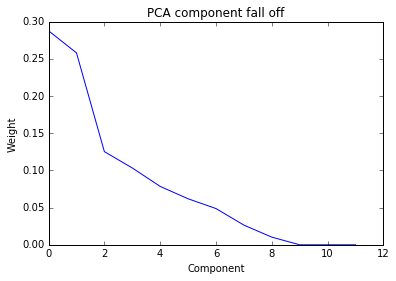

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("PCA component fall off")
ax.plot(pca_score)
ax.set_xlabel("Component")
ax.set_ylabel("Weight")

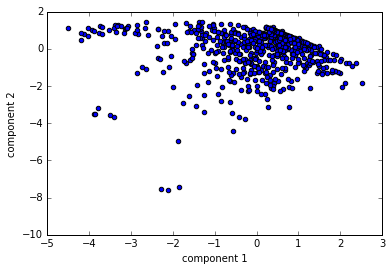

In [16]:
#lsince falls off by 3rd component, lets plot the first two

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#grab all rows of first and second components (columns of df_reduced)
ax.scatter(df_reduced[:,0], df_reduced[:,1])
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")

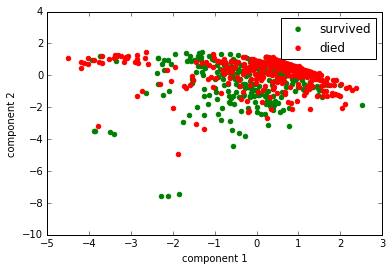

In [17]:
#lets use boolean masks to add class information:
yes = df_reduced[(df_clean['Survived']==1).nonzero()]
no = df_reduced[(df_clean['Survived']==0).nonzero()]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#grab all rows of first and second components (columns of df_reduced)
ax.scatter(yes[:,0], yes[:,1], label="survived", color="g")
ax.scatter(no[:,0], no[:,1], label="died", color="r")                                   
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.legend(scatterpoints=1)

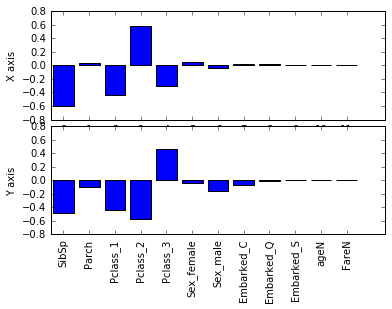

In [18]:
#doesn't seem seperable, but...

comp1 = pca_weights.T[0]
comp2 = pca_weights.T[1]

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.bar(range(comp1.shape[0]), comp1, align='center')
ax1.set_xticks(range(comp1.shape[0]))
ax1.set_xlim(-.5,12.5)
ax1.set_ylim(-.8,.8)
ax1.set_ylabel("X axis")

ax2 = fig.add_subplot(2,1,2)
ax2.bar(range(comp2.shape[0]), comp2, align='center')
ax2.set_xticks(range(comp2.shape[0]))
ax2.set_xticklabels(dfFV.keys(), rotation=90)
ax2.set_xlim(-.5,12.5)
ax2.set_ylim(-.8,.8)
ax2.set_ylabel("Y axis")

fig.subplots_adjust(wspace=0, hspace=0.06)

# So not the greatest seperation...new idea?

![kmeans](figs/kmeans.gif)
source: [Project Rhea: Introduction to Clustering](https://www.projectrhea.org/rhea/index.php/SlectureDavidRunyanCS662Spring14)

In [20]:

from sklearn import metrics
from sklearn.cluster import KMeans

kmean = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmean.fit(dfFV)
KMeans?

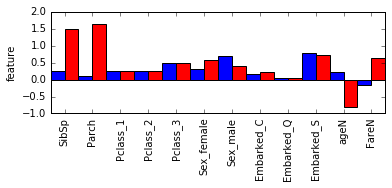

In [23]:
import numpy as np

cluster0 = kmean.cluster_centers_[0]
cluster1 = kmean.cluster_centers_[1]

inds = np.arange(kmean.cluster_centers_.shape[1])


fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.bar(inds, cluster0,width=.5, align='center', label="0")
ax1.bar(inds+.5, cluster1, width=.5, align='center', color='r',label= "1")
ax1.set_xticks(inds+.25)
ax1.set_xticklabels(dfFV.keys(), rotation=90)
ax1.set_xlim(-.25,11.75)
ax1.set_ylabel("feature")
ax.legend()

In [24]:
#accuracy? http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation
from sklearn import metrics

#since cluster 0 seems to be people who died 
#and cluster one seems to be people who lived
#we can directly compare actual, predicted
#raw mismatch
print("Accuracy: ", (df_clean["Survived"]== kmean.labels_).sum()/kmean.labels_.shape[0])

#[-1, 1], negative bad, 1 perfect, others?
print("Adjusted Rand: ", metrics.adjusted_rand_score(df_clean["Survived"].values, kmean.labels_))
print("Mutual Info Gain: ", metrics.adjusted_mutual_info_score(df_clean["Survived"].values,kmean.labels_))



Accuracy:  0.63202247191
Adjusted Rand:  0.057354054332465224
Mutual Info Gain:  0.0257887658552


# What's next?

![super](figs/super.gif)
source:[Dynamic Science: Classification](http://www.dynamicscience.com.au/tester/solutions1/biology/classification/class.html)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
#fits on values used for prediction, expected class
neigh.fit(dfFV.values, df_clean['Survived'].values) 
print(neigh.score(dfFV.values, df_clean['Survived'].values))

0.831460674157


In [28]:
dfFV.to_csv("titanictrainfv.csv")

In [26]:
#how do we predict the class of a value?
labels = neigh.predict(dfFV)
#confusion matrix is:
#[[True Positive, False Negative]]
#[[False Positive True Negative]]
print(metrics.confusion_matrix(labels, df_clean['Survived'].values))

[[390  86]
 [ 34 202]]


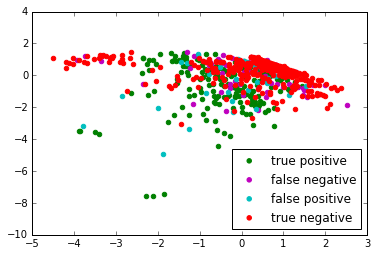

In [27]:
%matplotlib inline
actual = df_clean['Survived'].values
TP = df_reduced[((labels == actual) & (actual==1))]
FN = df_reduced[((labels!=actual) & (actual==1))]
FP = df_reduced[((labels!=actual) & (actual==0))]
TN = df_reduced[((labels==actual) & (actual==0))]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(TP[:,0], TP[:,1], color='g', label="true positive")
ax.scatter(FN[:,0], FN[:,1], color='m', label="false negative")
ax.scatter(FP[:,0], FP[:,1], color='c', label="false positive")
ax.scatter(TN[:,0], TN[:,1], color='r', label="true negative")
ax.legend(scatterpoints=1, loc=4)

Challenge
==========
Test out the classifier!

1) Download the file `titanictest.csv` from the [github repo](https://github.com/GCDigitalFellows/gcdri_ts_cat_ml)

2) Clean it & encode it in the same manner as `titanic.csv` as it's structured the same

3) Use the classifier to predict who survided and who didn't

4) Evaluate the skill of the classifier at [https://www.kaggle.com/c/titanic/submissions/attach)
